In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math 

In [2]:
df = pd.read_csv("Alquileres_text.csv")
df = df.drop("link", axis=1)
df.head(3)

,tamaño,cuartos,baños,sala,comedor,cocina,lavanderia,parqueos,zona,colegios,...,estrato,amueblado,cantidad_piso,num_piso,zona_comercial,zona_vivienda,transporte_publico,punt_amenidades,vistas,text
0,50.0,1,1.0,1.00,1.00,1.00,0.0,0.0,1,20,...,Bajo,0.0,3,3.0,1,0,1,0,0,alquiler apartamentos zona 1 apartamento cerca...
1,48.0,1,1.0,0.33,0.33,0.33,0.0,0.0,1,20,...,Bajo,0.0,1,3.0,1,0,1,0,0,citymax advance ofrece lindo apartamento renta...
2,60.0,2,2.0,0.33,0.33,0.33,1.0,1.0,1,20,...,Bajo,0.5,1,1.0,1,0,1,4,0,página encontrada mapainmueble inicioalquilera...


In [3]:
for col in df:
    tipo = df[col].dtype
    if(tipo == "object"):
        print(f'{col}: {tipo}')

tipo_vivienda: object
estado: object
estrato: object
text: object


In [4]:
df['estrato'] = df['estrato'].apply(lambda x: 0 if x == 'Bajo' else (1 if x == 'Medio' else 2))
df['estado'] = df['estado'].apply(lambda x: 0 if x == 'Viejo' else 1)
df.info()

df['tipo_vivienda']= df['tipo_vivienda'].apply(str.capitalize)
df['tipo_vivienda'].unique()

df_onehot = pd.get_dummies(df, columns=['tipo_vivienda'], drop_first=False)
bool_cols = ['tipo_vivienda_Apartamento', 'tipo_vivienda_Casa']
df_onehot[bool_cols] = df_onehot[bool_cols].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tamaño              156 non-null    float64
 1   cuartos             156 non-null    int64  
 2   baños               156 non-null    float64
 3   sala                156 non-null    float64
 4   comedor             156 non-null    float64
 5   cocina              156 non-null    float64
 6   lavanderia          156 non-null    float64
 7   parqueos            156 non-null    float64
 8   zona                156 non-null    int64  
 9   colegios            156 non-null    int64  
 10  hospitales          156 non-null    int64  
 11  precio_renta        156 non-null    float64
 12  tipo_vivienda       156 non-null    object 
 13  estado              156 non-null    int64  
 14  estrato             156 non-null    int64  
 15  amueblado           156 non-null    float64
 16  cantidad

In [5]:
columnas = ["text"] + [col for col in df_onehot.columns if col != "text"]
df_onehot = df_onehot[columnas]
df_onehot

,text,tamaño,cuartos,baños,sala,comedor,cocina,lavanderia,parqueos,zona,...,amueblado,cantidad_piso,num_piso,zona_comercial,zona_vivienda,transporte_publico,punt_amenidades,vistas,tipo_vivienda_Apartamento,tipo_vivienda_Casa
0,alquiler apartamentos zona 1 apartamento cerca...,50.0,1,1.0,1.00,1.00,1.00,0.0,0.0,1,...,0.00,3,3.0,1,0,1,0,0,1,0
1,citymax advance ofrece lindo apartamento renta...,48.0,1,1.0,0.33,0.33,0.33,0.0,0.0,1,...,0.00,1,3.0,1,0,1,0,0,1,0
2,página encontrada mapainmueble inicioalquilera...,60.0,2,2.0,0.33,0.33,0.33,1.0,1.0,1,...,0.50,1,1.0,1,0,1,4,0,1,0
3,apartamento amueblado zona 1 mapainmueble inic...,56.0,1,1.0,0.00,0.33,0.33,0.0,0.0,1,...,0.00,1,1.0,1,0,1,0,1,1,0
4,mapainmueblecom encuentra aquí casas apartamen...,20.0,1,1.0,0.00,0.33,0.33,0.0,1.0,1,...,1.00,1,0.0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,apartamento renta edificio orleans zona 15 gua...,130.0,1,2.0,0.33,0.33,1.00,1.0,2.0,15,...,0.33,1,9.0,0,1,0,1,0,1,0
152,apartamento renta zona 16 frente embajada amer...,275.0,3,3.0,0.33,0.33,1.00,1.0,2.0,16,...,0.33,2,2.0,1,1,0,5,0,1,0
153,apartamento amueblado renta zona 16 hexa cañad...,50.0,3,1.0,0.33,0.33,0.33,1.0,2.0,16,...,1.00,1,3.0,1,1,0,0,0,1,0
154,alquilo apartamento condominio zona 16 apartam...,120.0,3,2.0,0.33,0.33,1.00,1.0,2.0,16,...,0.33,1,1.0,1,1,0,8,0,1,0


In [6]:
for col in df_onehot:
    porcentaje = df_onehot[col].isnull().mean()
    if (porcentaje > 0):
        print(f'{col}: {porcentaje}')

text: 0.00641025641025641


In [7]:

        
df_onehot = df_onehot.dropna()

for col in df_onehot:
    porcentaje = df_onehot[col].isnull().mean()
    if (porcentaje > 0):
        print(f'{col}: {porcentaje}')

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_onehot['text']).toarray()

X.shape


(155, 1000)

In [9]:

Y = df_onehot[df_onehot.columns[1:]]
Y.head(3)

,tamaño,cuartos,baños,sala,comedor,cocina,lavanderia,parqueos,zona,colegios,...,amueblado,cantidad_piso,num_piso,zona_comercial,zona_vivienda,transporte_publico,punt_amenidades,vistas,tipo_vivienda_Apartamento,tipo_vivienda_Casa
0,50.0,1,1.0,1.00,1.00,1.00,0.0,0.0,1,20,...,0.0,3,3.0,1,0,1,0,0,1,0
1,48.0,1,1.0,0.33,0.33,0.33,0.0,0.0,1,20,...,0.0,1,3.0,1,0,1,0,0,1,0
2,60.0,2,2.0,0.33,0.33,0.33,1.0,1.0,1,20,...,0.5,1,1.0,1,0,1,4,0,1,0


In [10]:
print(Y.columns)

Index(['tamaño', 'cuartos', 'baños', 'sala', 'comedor', 'cocina', 'lavanderia',
       'parqueos', 'zona', 'colegios', 'hospitales', 'precio_renta', 'estado',
       'estrato', 'amueblado', 'cantidad_piso', 'num_piso', 'zona_comercial',
       'zona_vivienda', 'transporte_publico', 'punt_amenidades', 'vistas',
       'tipo_vivienda_Apartamento', 'tipo_vivienda_Casa'],
      dtype='object')


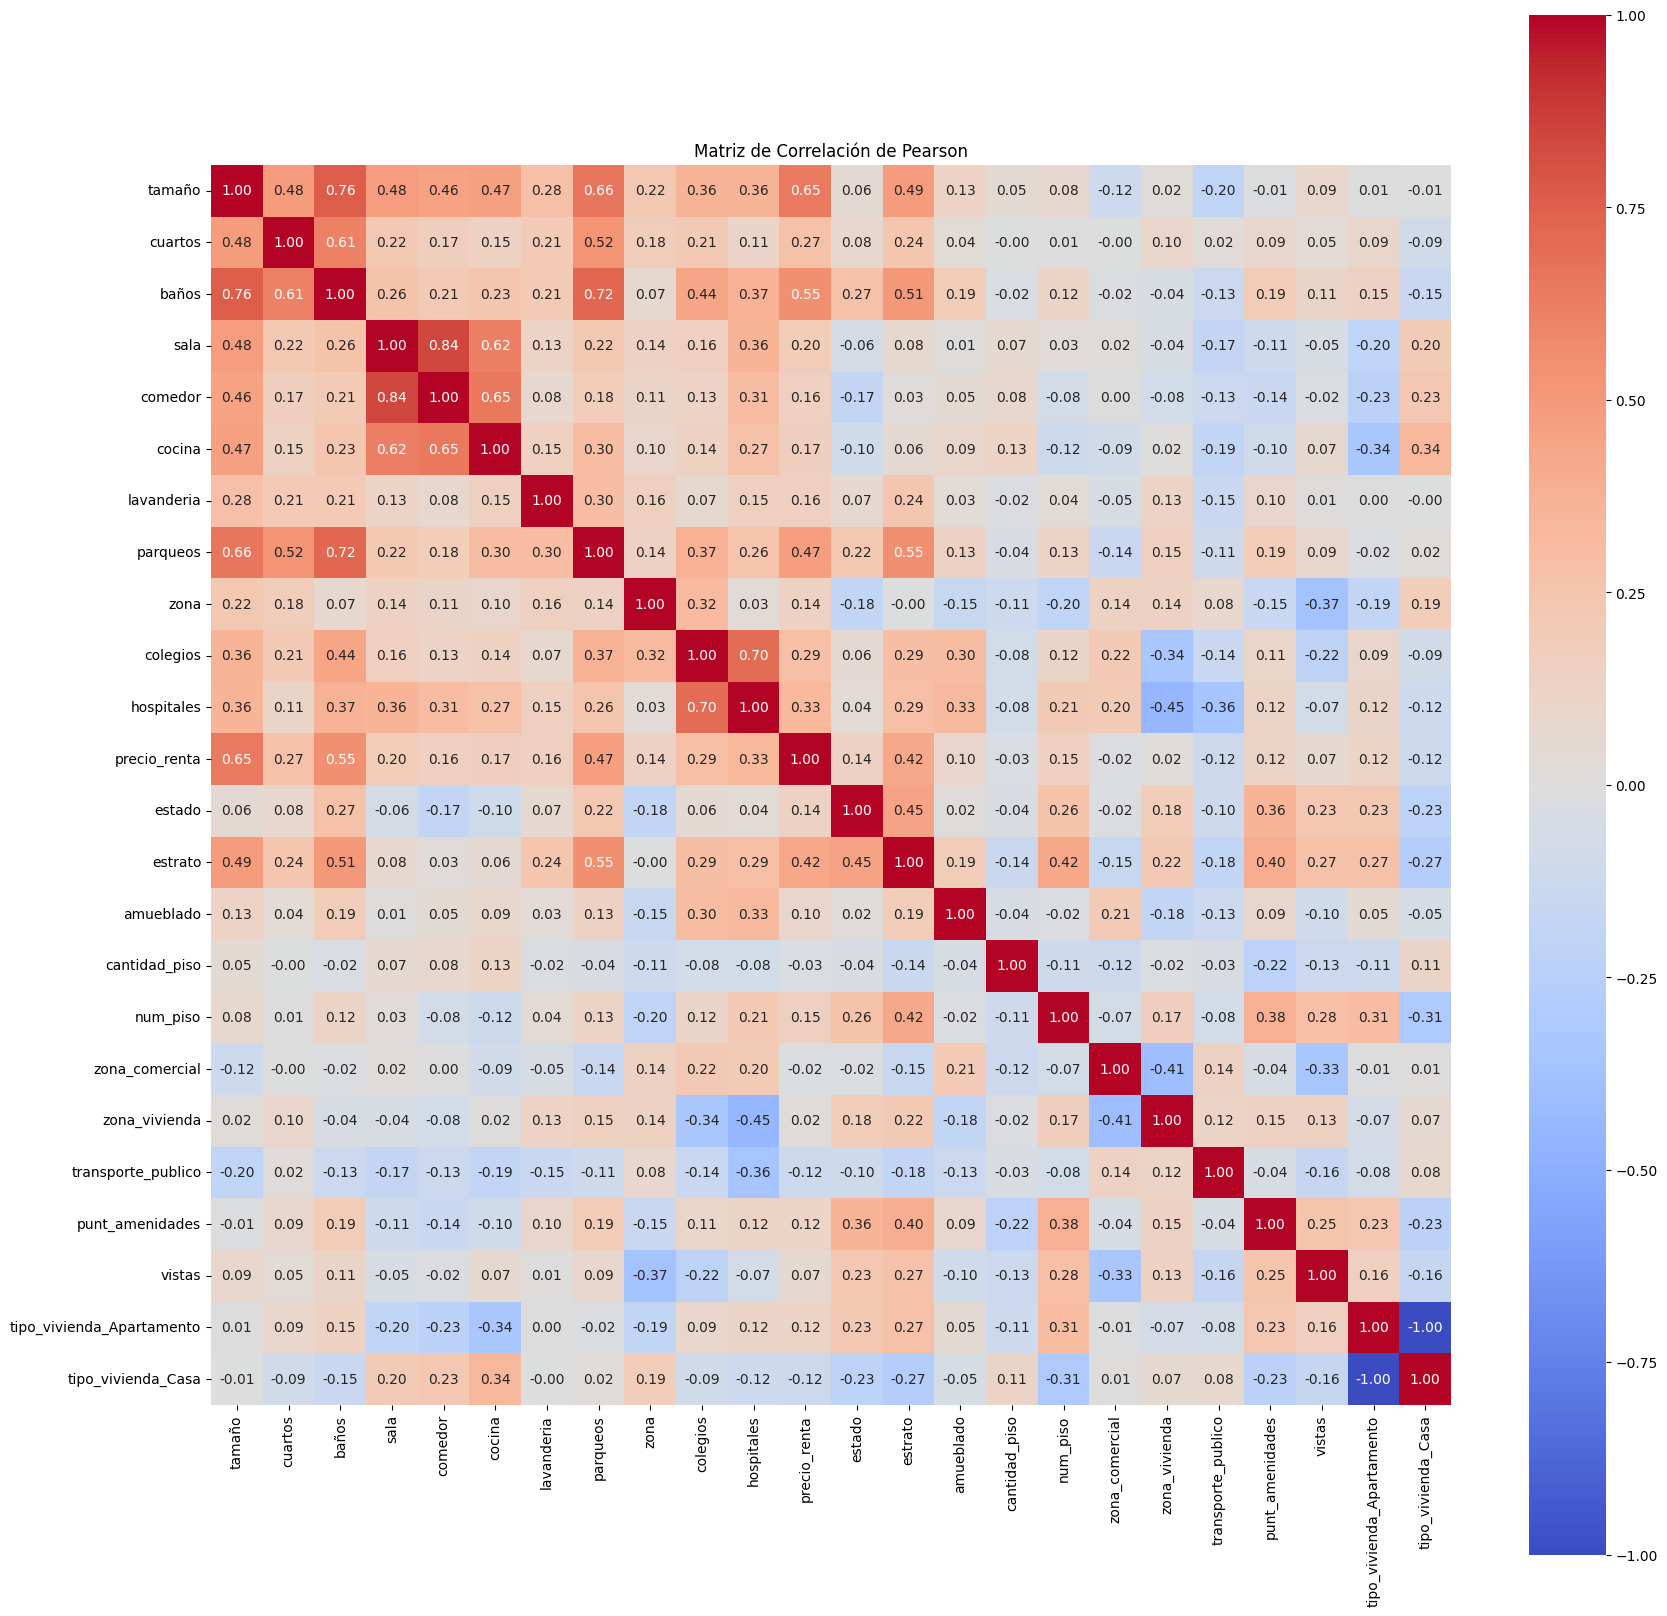

In [11]:
correlation_matrix = Y.corr(method='pearson')

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación de Pearson")
plt.show()

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split

# Dividir datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Modelo multisalida
rf = RandomForestRegressor()
model = MultiOutputRegressor(rf)
model.fit(X_train, Y_train)


MultiOutputRegressor(estimator=RandomForestRegressor())

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predicciones
Y_pred = model.predict(X_test)

# Evaluar cada salida
i = 0
for col in Y.columns:
    rmse = np.sqrt(mean_squared_error(Y_test[col], Y_pred[:, i]))
    mae = mean_absolute_error(Y_test[col], Y_pred[:, i])
    print(f"{col}\t: RMSE={rmse}, MAE={mae}")
    i = i + 1

tamaño	: RMSE=37.31447170116529, MAE=23.711374108866046
cuartos	: RMSE=0.6268892090148587, MAE=0.3369736186752315
baños	: RMSE=0.38950842831733706, MAE=0.2599756318949867
sala	: RMSE=0.2969822254365649, MAE=0.22083137864823316
comedor	: RMSE=0.2744945608412879, MAE=0.1875314516129028
cocina	: RMSE=0.293194981904173, MAE=0.23364827956989223
lavanderia	: RMSE=0.4448872389019686, MAE=0.3831924577572965
parqueos	: RMSE=0.6716598507390307, MAE=0.5013324372759856
zona	: RMSE=6.6591390584217836, MAE=4.527018945212493
colegios	: RMSE=7.289467612017295, MAE=6.23858481035094
hospitales	: RMSE=16.835865867766817, MAE=12.567744123260253
precio_renta	: RMSE=4885.048225237477, MAE=2674.504939403249
estado	: RMSE=0.5120048214821193, MAE=0.4313275711743454
estrato	: RMSE=0.5791411118196275, MAE=0.44984110692175205
amueblado	: RMSE=0.2654728649664987, MAE=0.17291042917655805
cantidad_piso	: RMSE=0.5692553143390282, MAE=0.15935483870967745
num_piso	: RMSE=4.656943322178809, MAE=3.3134177227342554
zona_c

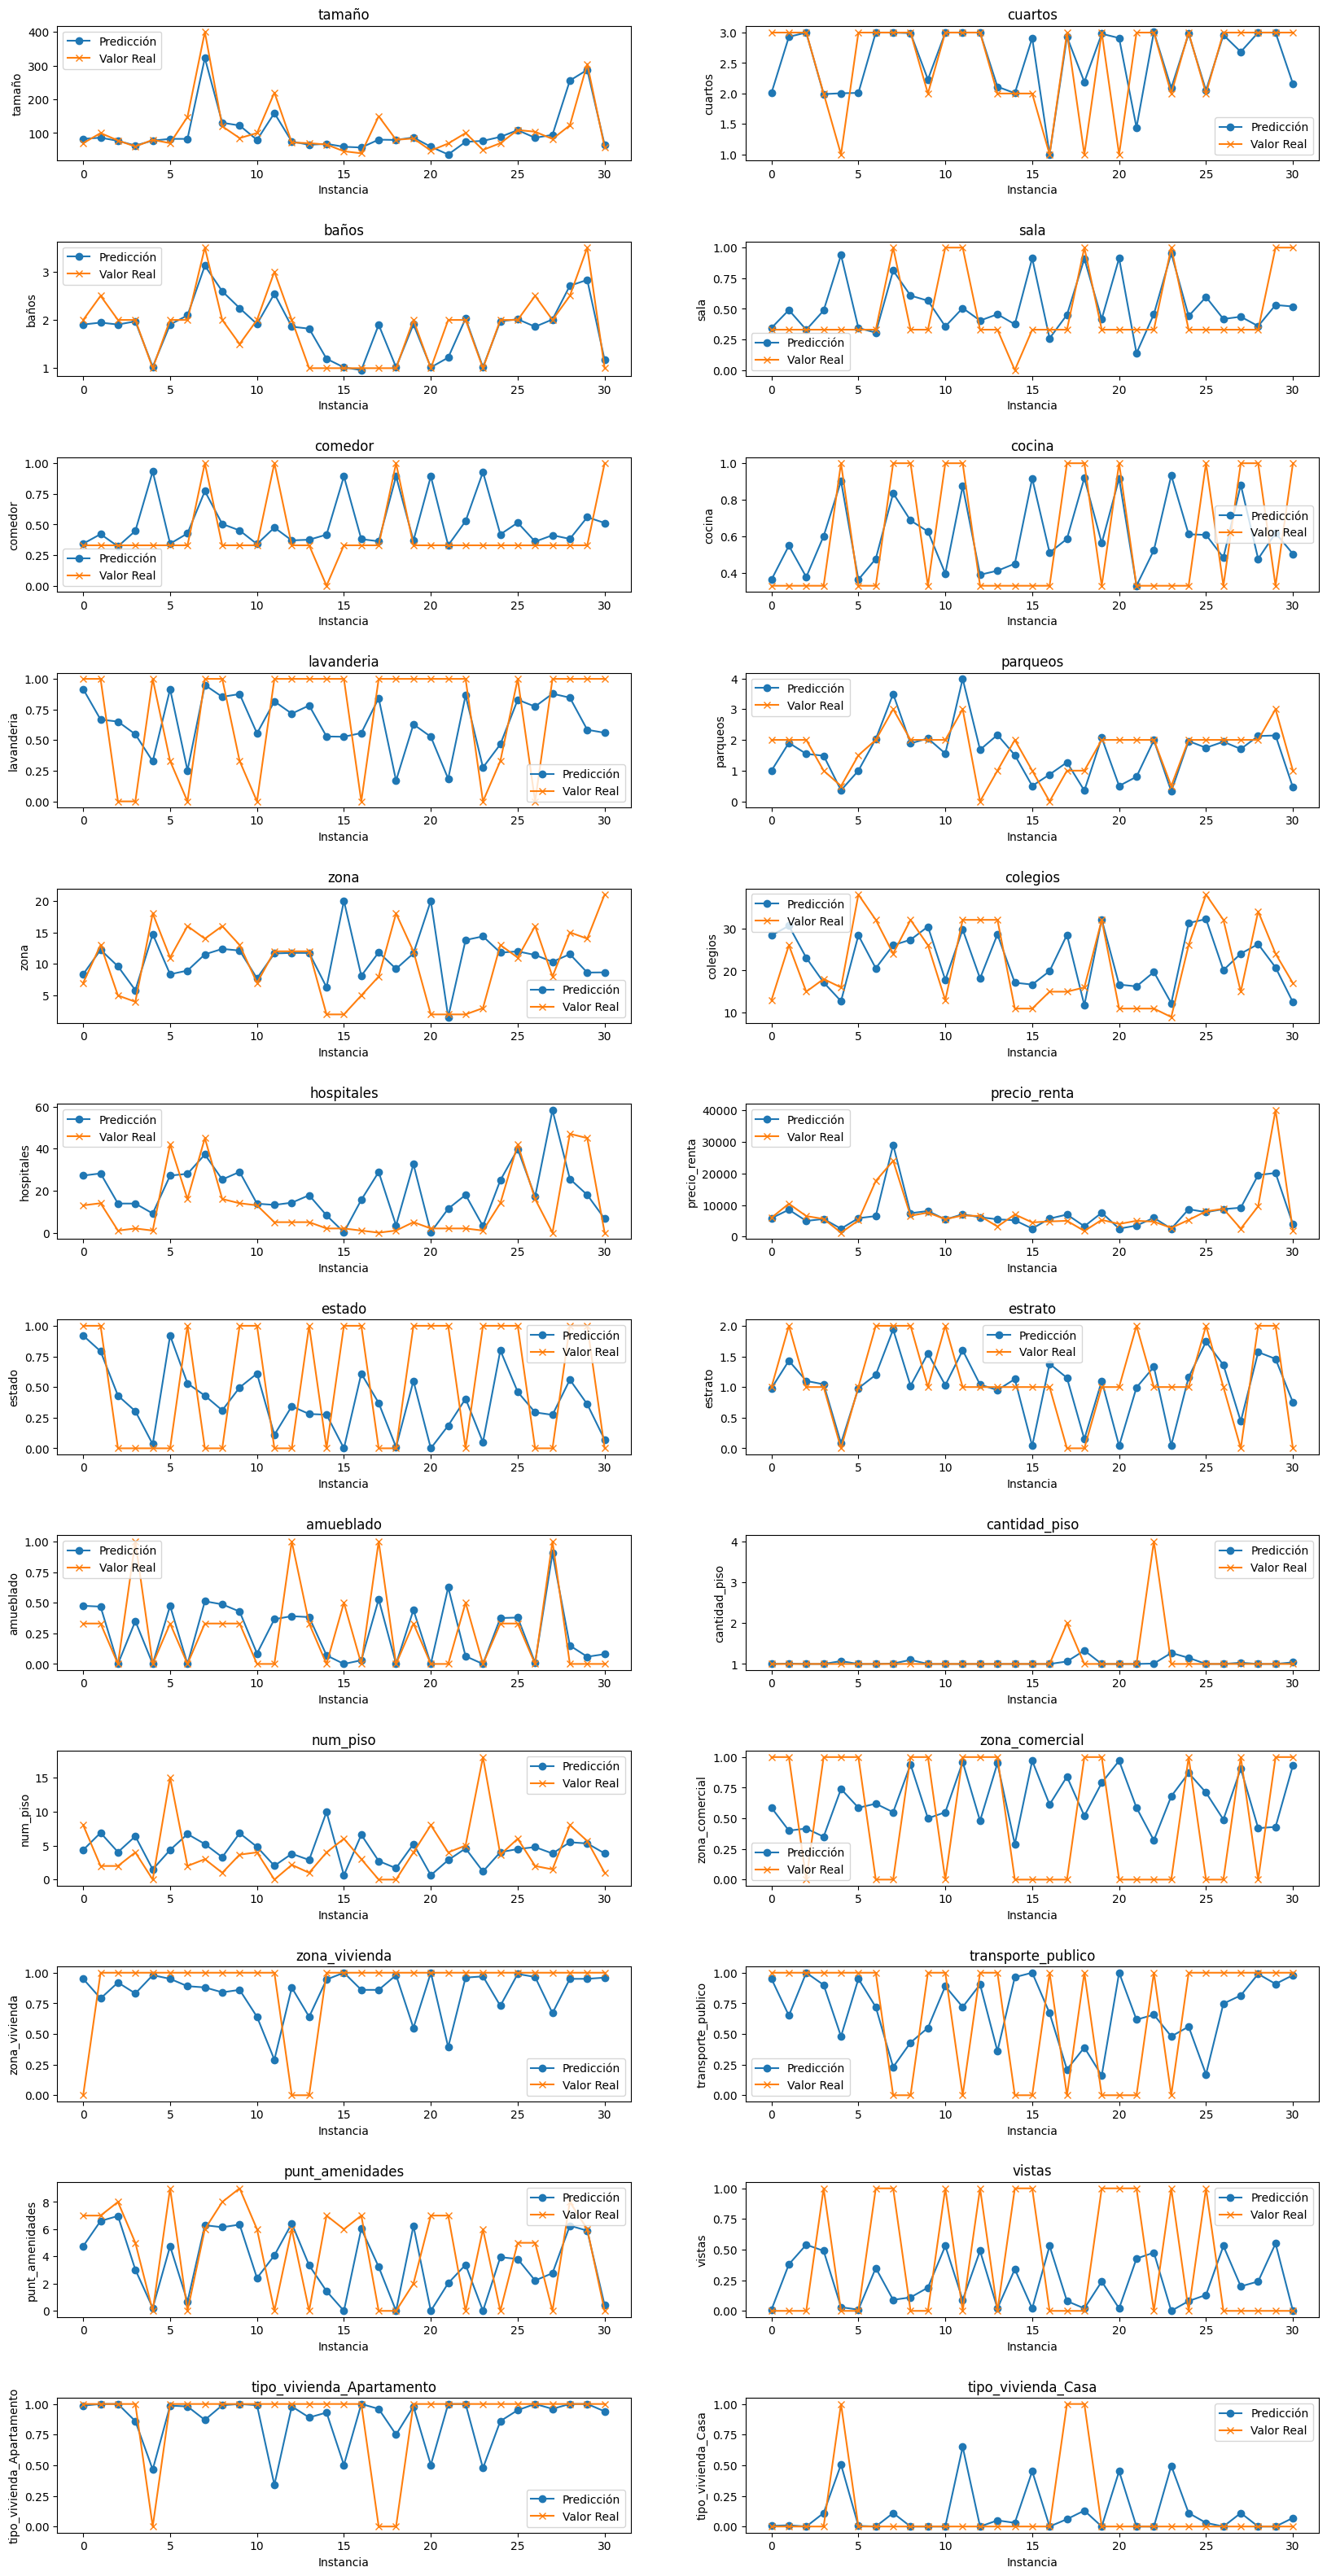

In [14]:
def plot(Y_test, Y_pred):
    test =  Y_test.reset_index(drop=True)
    test.shape

    n = 2
    rows = int(np.ceil(test.shape[1] / n))  # Calcular filas dinámicamente
    fig, axs = plt.subplots(rows, n, figsize=(20, 40))
    axs = axs.flatten()  # Aplanar axs para un acceso simple

    for i, col in enumerate(Y_test.columns):
        axs[i].plot(Y_pred[:, i], label='Predicción', marker='o')
        axs[i].plot(test[col], label='Valor Real', marker='x')

        axs[i].set_title(f'{col}')
        axs[i].set_xlabel('Instancia')
        axs[i].set_ylabel(f'{col}')
        axs[i].legend()

    # Ocultar subplots vacíos si sobran
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.subplots_adjust(wspace=0.2, hspace=0.6)
    plt.show()
    
plot(Y_test, Y_pred)

In [16]:
import joblib

# Guardar modelo
with open('multioutput_model.joblib', 'wb') as f:
    joblib.dump(model, f)

# Guardar vectorizador
with open('vectorizer.joblib', 'wb') as f:
    joblib.dump(vectorizer, f)


In [45]:

resultado = [Y_pred[1][i] for i in range(len(Y_pred[1])) if i != 11]
resultado

[np.float64(80.52590000000004),
 np.float64(2.95),
 np.float64(1.855),
 np.float64(0.5029999999999992),
 np.float64(0.41249999999999937),
 np.float64(0.5452999999999992),
 np.float64(0.7022999999999996),
 np.float64(2.05),
 np.float64(12.22),
 np.float64(32.19),
 np.float64(38.36),
 np.float64(0.7843333333333332),
 np.float64(1.5),
 np.float64(0.48169999999999946),
 np.float64(1.03),
 np.float64(6.513333333333332),
 np.float64(0.41),
 np.float64(0.82),
 np.float64(0.6),
 np.float64(6.1825),
 np.float64(0.43),
 np.float64(1.0),
 np.float64(0.01)]

In [54]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
